# DEC PDF Text Extraction

In [1]:
import pandas as pd
import numpy as np
import pdfplumber
from tqdm import tqdm

## Import Joined DEC_J2SR Data

In [2]:
dec_j2sr_data = pd.read_csv('Working_Data/dec_j2sr_data.csv')
dec_j2sr_data.shape

(1149, 65)

In [3]:
from random import seed
from random import randint

file_number = randint(0,dec_j2sr_data.shape[0])
file_number

274

In [5]:
import urllib.request

print('Beginning file download with urllib2...')

url = str(dec_j2sr_data['File'][file_number])
name = str(dec_j2sr_data['Unique_ID'][file_number])
path = '/home/aaron/Desktop/dec_j2sr/Working_Data/' + name + '.pdf'
urllib.request.urlretrieve(url, path)

Beginning file download with urllib2...


('/home/aaron/Desktop/dec_j2sr/PA-00J-MRP.pdf',
 <http.client.HTTPMessage at 0x7fe64d28adc0>)

In [10]:
# Function to visualize page as image in notebook

with pdfplumber.open(path) as pdf:
    first_page = pdf.pages[2]
    
first_page.to_image(resolution=150)

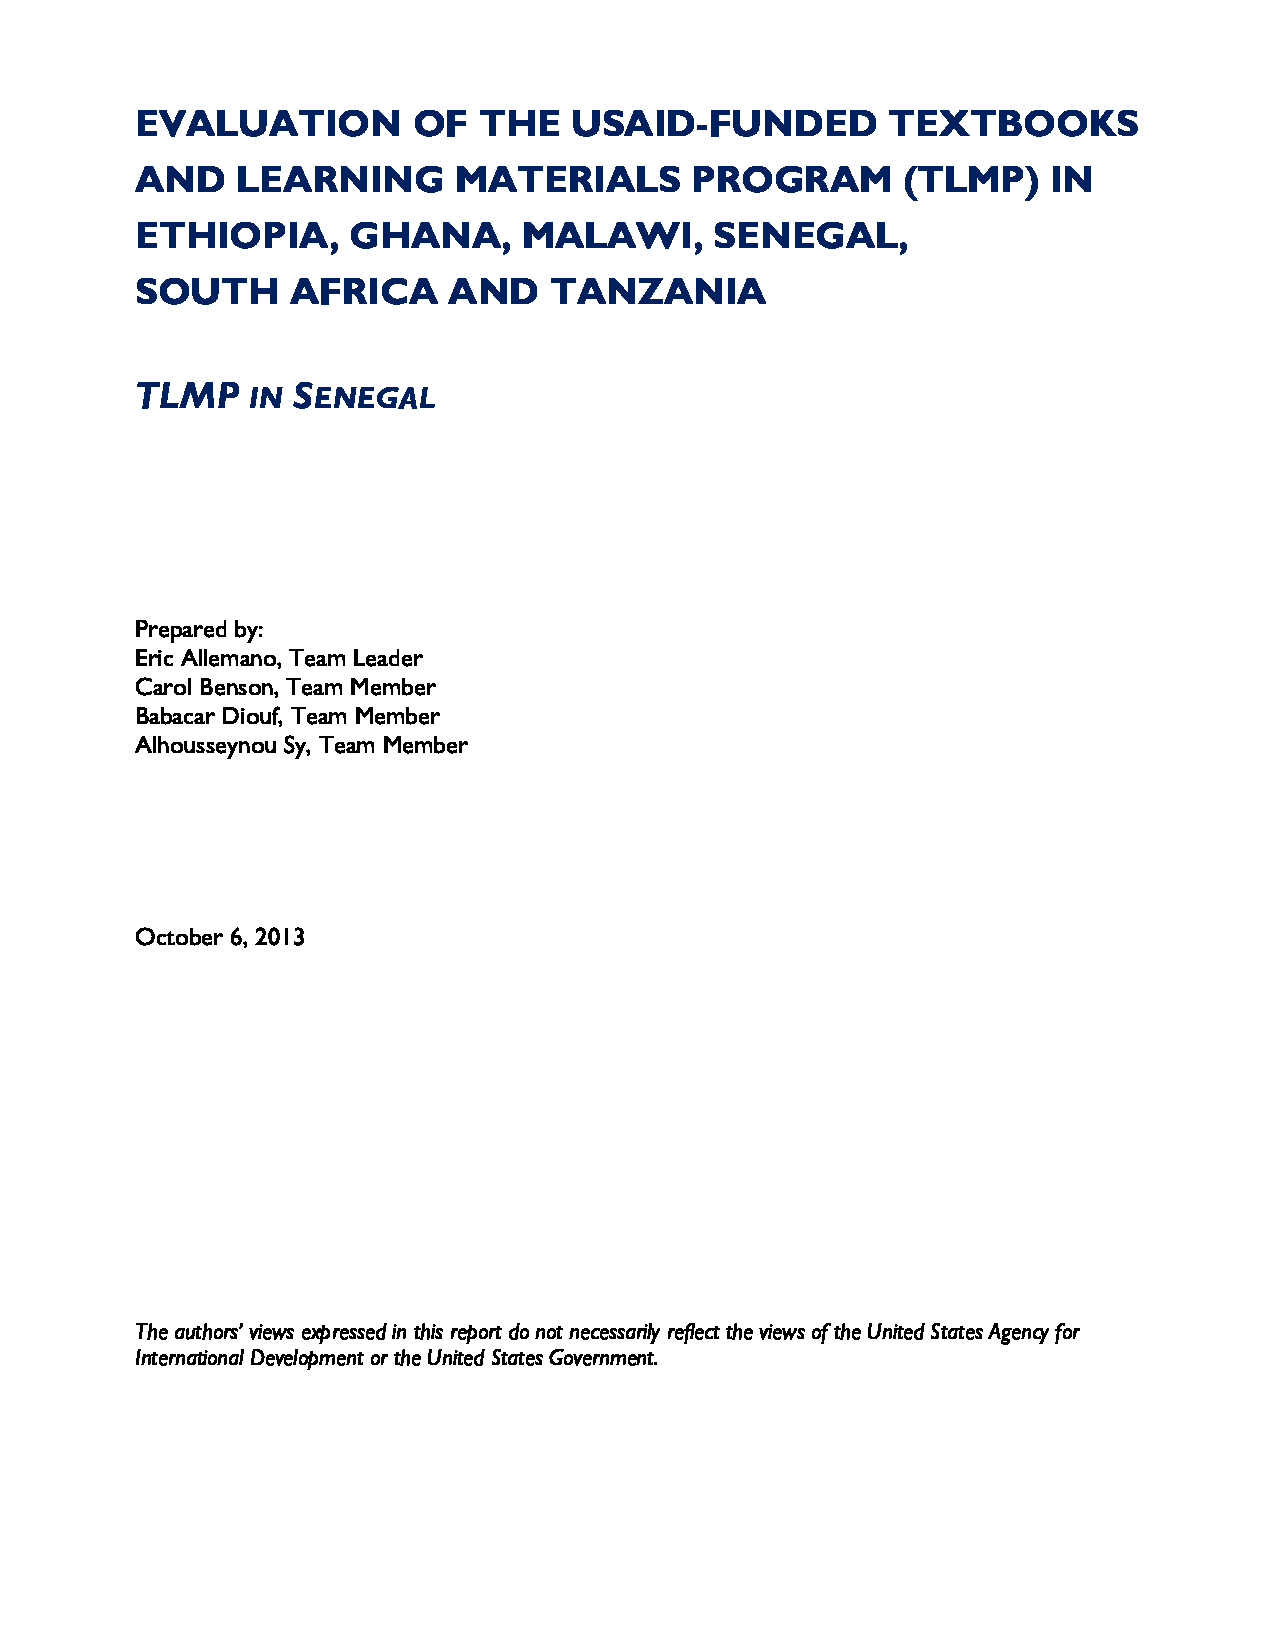

In [12]:
with pdfplumber.open(path) as pdf:
    first_page = pdf.pages[2]
    first_page_text = first_page.extract_text(x_tolerance=3, y_tolerance=3)

In [13]:
first_page_text

'EVALUATION OF THE USAID-FUNDED TEXTBOOKS \nAND LEARNING MATERIALS PROGRAM (TLMP) IN  \nETHIOPIA, GHANA, MALAWI, SENEGAL,  \nSOUTH AFRICA AND TANZANIA  \nTLMP IN SENEGAL \nPrepared by:\nEric Allemano, Team Leader \nCarol Benson, Team Member \nBabacar Diouf, Team Member \nAlhousseynou Sy, Team Member \nOctober 6, 2013 \nThe authors’ views expressed in this report do not necessarily reflect the views of the United States Agency for \nInternational Development or the United States Government. '

In [14]:
first_page_split = pd.DataFrame(first_page_text.split('\n'))
first_page_split

,0
0,EVALUATION OF THE USAID-FUNDED TEXTBOOKS
1,AND LEARNING MATERIALS PROGRAM (TLMP) IN
2,"ETHIOPIA, GHANA, MALAWI, SENEGAL,"
3,SOUTH AFRICA AND TANZANIA
4,TLMP IN SENEGAL
5,Prepared by:
6,"Eric Allemano, Team Leader"
7,"Carol Benson, Team Member"
8,"Babacar Diouf, Team Member"
9,"Alhousseynou Sy, Team Member"


In [15]:
first_page_clean = first_page_split[~first_page_split.loc[:,0].isin([' '])]
first_page_clean

,0
0,EVALUATION OF THE USAID-FUNDED TEXTBOOKS
1,AND LEARNING MATERIALS PROGRAM (TLMP) IN
2,"ETHIOPIA, GHANA, MALAWI, SENEGAL,"
3,SOUTH AFRICA AND TANZANIA
4,TLMP IN SENEGAL
5,Prepared by:
6,"Eric Allemano, Team Leader"
7,"Carol Benson, Team Member"
8,"Babacar Diouf, Team Member"
9,"Alhousseynou Sy, Team Member"


In [51]:
# Create an empty dataframe with 100 rows and as many columns as there are pages in the pdf file

pdf_frame = pd.DataFrame(np.nan, index=range(100), columns=range(len(pdf.pages)))

In [52]:
# Loop through pages in the pdf file, extracting the contents of the current page, splitting the text by line, and saving the page as a column in the pdf_frame dataframe

for page in tqdm(range(len(pdf.pages))):
    with pdfplumber.open(path) as pdf:
        current_page = pdf.pages[page]
        current_page_text = current_page.extract_text(x_tolerance=2, y_tolerance=2)
        if current_page_text is not None:
            current_page_split = pd.DataFrame(current_page_text.split('\n'))
        current_page_clean = current_page_split[~current_page_split.loc[:,0].isin([' '])]
        pdf_frame.loc[:,page] = current_page_clean.reset_index().loc[:,0]

100%|██████████| 61/61 [05:07<00:00,  5.03s/it]


In [53]:
# Drop rows and columns containing only missing values, then save the pdf_frame as a csv file

pdf_frame.dropna(how='all',inplace=True)
pdf_frame.dropna(how='all',axis=1, inplace=True)

pdf_frame.to_csv('pdf_frame_ex.csv')

pdf_frame.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,EVALUATION,Intentionally left blank,EVALUATION OF THE USAID-FUNDED TEXTBOOKS,Performance Evaluation of TLMP – Senegal i,Performance Evaluation of TLMP – Senegal ii,Performance Evaluation of TLMP – Senegal iii,Performance Evaluation of TLMP – Senegal iv,Performance Evaluation of TLMP – Senegal v,EXECUTIVE SUMMARY,Performance Evaluation of TLMP – Senegal 2,...,Performance Evaluation of TLMP – Senegal 44,Performance Evaluation of TLMP – Senegal 45,Performance Evaluation of TLMP – Senegal 46,Performance Evaluation of TLMP – Senegal 47,Performance Evaluation of TLMP – Senegal 48,Performance Evaluation of TLMP – Senegal 49,Performance Evaluation of TLMP – Senegal 50,Performance Evaluation of TLMP – Senegal 51,Performance Evaluation of TLMP – Senegal 52,Performance Evaluation of TLMP – Senegal 53
1,EVALUATION REPORT,NaN,AND LEARNING MATERIALS PROGRAM (TLMP) IN,Table of Contents,ANNEX D. SCHEDULE OF STAKEHOLDER INTERVIEWS AN...,ACKNOWLEDGEMENTS,LIST OF ACRONYMS AND TERMS,THE SENEGALESE SCHOOL SYSTEM,Overview,with the aim of producing at least one million...,...,ANNEX E. SUMMARY OF FINDINGS,issues are the Project Director at ECSU and,7. Teacher Despite claims by the TLMP Project ...,Ed-in-Chief,This “livret” (workbook) is not meant to be wr...,ANNEX G. LIST OF CLARIFICATIONS ON THE TLMS FO...,ANNEX H. CONFLICT OF INTEREST STATEMENTS,NaN,Name Babacar DIOUF,NaN
2,Evaluation of the USAID-Funded Textbooks and L...,NaN,"ETHIOPIA, GHANA, MALAWI, SENEGAL,",ACKNOWLEDGEMENTS ................................,ANNEX E. SUMMARY OF FINDINGS ....................,The in-country team members would like to expr...,AEI President’s African Education Initiative,"École elementaire Elementary school (6 years,...",TLMP was implemented in Senegal between 2009 a...,"was funded in the amount of $3,000,000 (Octobe...",...,Summary of Findings about the TLMs,USAID Senegal. Later books add the MOE.,training and statements in newsletters that te...,Math 4ème-3ème J Houston & J Houston,Collaboration with USAID basic ed (EDB) projec...,DISTRIBUTION,NaN,NaN,Title Consultant national,NaN
3,"Program (TLMP) in Ethiopia, Ghana, Malawi, Sen...",NaN,SOUTH AFRICA AND TANZANIA,LIST OF ACRONYMS AND TERMS ......................,ANNEX F. EVALUATION OF SELECTED TLMS.............,Education officials to provide documents and i...,CA Cooperative Agreement,"Collège Middle school (4 years, equivalen...",awarded by USAID’s Africa Bureau to Elizabeth ...,"additional $2,000,000 (October 1, 2007), bring...",...,Topic Findings Comments, TLMs that are translated and edited,"had been trained, no evidence of this was",Suppl. 0 0 0 0 0,Ed-in-Chief,The following is a list of clarifications for ...,NaN,NaN,Organization IBTCI,NaN
4,and Tanzania,NaN,TLMP S,THE SENEGALESE SCHOOL SYSTEM ....................,ANNEX G. LIST OF CLARIFICATIONS ON THE TLMS FO...,"schools, teachers, and students. Dr. Abdou Sen...",CPD Continuous Professional Development,"Sécondaire, lycée Secondary school (2-3 years)",was envisioned as a program to generate high q...,"$5,000,000, and producing 1,634,000 books. Wit...",...,1. Responsibility  2004-2006: 80% of the work...,versions of American textbooks do not,found during the field visits.,(2008) (9th-10th) USAID Asst Ed,"Men (non-Af 28,32, Non-Senegalese (28,",department directors) regarding TLMP materials...,NaN,NaN,Evaluation Position Team Leader Team member X,NaN


In [54]:
# Replace column names with page numbers
import re

pdf_frame_pages = []

not_found_num = 0

for col in range(pdf_frame.shape[1]):
    non_nan_col = pdf_frame.loc[:,col][pdf_frame.loc[:,col].notna()]
    last_row = non_nan_col[non_nan_col.shape[0]-1]
    page = re.findall(r'\d+', last_row)
    if not page:
        page = ["nf" + str(not_found_num)]
        not_found_num += 1
    col_name = "page" + "_" + page[0]
    pdf_frame_pages.append(col_name)
    
pdf_frame_pages[0:10]

['page_nf0',
 'page_nf1',
 'page_nf2',
 'page_25',
 'page_50',
 'page_nf3',
 'page_nf4',
 'page_nf5',
 'page_1',
 'page_nf6']

In [55]:
first_page_index = pd.Series(pdf_frame_pages).str.contains("page_1").idxmax()
new_pages = []
for col in range(len(pdf_frame_pages)):
    new_pages.append(col - first_page_index + 1)
    
len(new_pages) == len(pdf_frame_pages)

True

In [56]:
pdf_frame_new = pdf_frame
pdf_frame_new.columns = new_pages
pdf_frame_new.loc[0:10,:]

,-7,-6,-5,-4,-3,-2,-1,0,1,2,...,44,45,46,47,48,49,50,51,52,53
0,EVALUATION,Intentionally left blank,EVALUATION OF THE USAID-FUNDED TEXTBOOKS,Performance Evaluation of TLMP – Senegal i,Performance Evaluation of TLMP – Senegal ii,Performance Evaluation of TLMP – Senegal iii,Performance Evaluation of TLMP – Senegal iv,Performance Evaluation of TLMP – Senegal v,EXECUTIVE SUMMARY,Performance Evaluation of TLMP – Senegal 2,...,Performance Evaluation of TLMP – Senegal 44,Performance Evaluation of TLMP – Senegal 45,Performance Evaluation of TLMP – Senegal 46,Performance Evaluation of TLMP – Senegal 47,Performance Evaluation of TLMP – Senegal 48,Performance Evaluation of TLMP – Senegal 49,Performance Evaluation of TLMP – Senegal 50,Performance Evaluation of TLMP – Senegal 51,Performance Evaluation of TLMP – Senegal 52,Performance Evaluation of TLMP – Senegal 53
1,EVALUATION REPORT,NaN,AND LEARNING MATERIALS PROGRAM (TLMP) IN,Table of Contents,ANNEX D. SCHEDULE OF STAKEHOLDER INTERVIEWS AN...,ACKNOWLEDGEMENTS,LIST OF ACRONYMS AND TERMS,THE SENEGALESE SCHOOL SYSTEM,Overview,with the aim of producing at least one million...,...,ANNEX E. SUMMARY OF FINDINGS,issues are the Project Director at ECSU and,7. Teacher Despite claims by the TLMP Project ...,Ed-in-Chief,This “livret” (workbook) is not meant to be wr...,ANNEX G. LIST OF CLARIFICATIONS ON THE TLMS FO...,ANNEX H. CONFLICT OF INTEREST STATEMENTS,NaN,Name Babacar DIOUF,NaN
2,Evaluation of the USAID-Funded Textbooks and L...,NaN,"ETHIOPIA, GHANA, MALAWI, SENEGAL,",ACKNOWLEDGEMENTS ................................,ANNEX E. SUMMARY OF FINDINGS ....................,The in-country team members would like to expr...,AEI President’s African Education Initiative,"École elementaire Elementary school (6 years,...",TLMP was implemented in Senegal between 2009 a...,"was funded in the amount of $3,000,000 (Octobe...",...,Summary of Findings about the TLMs,USAID Senegal. Later books add the MOE.,training and statements in newsletters that te...,Math 4ème-3ème J Houston & J Houston,Collaboration with USAID basic ed (EDB) projec...,DISTRIBUTION,NaN,NaN,Title Consultant national,NaN
3,"Program (TLMP) in Ethiopia, Ghana, Malawi, Sen...",NaN,SOUTH AFRICA AND TANZANIA,LIST OF ACRONYMS AND TERMS ......................,ANNEX F. EVALUATION OF SELECTED TLMS.............,Education officials to provide documents and i...,CA Cooperative Agreement,"Collège Middle school (4 years, equivalen...",awarded by USAID’s Africa Bureau to Elizabeth ...,"additional $2,000,000 (October 1, 2007), bring...",...,Topic Findings Comments, TLMs that are translated and edited,"had been trained, no evidence of this was",Suppl. 0 0 0 0 0,Ed-in-Chief,The following is a list of clarifications for ...,NaN,NaN,Organization IBTCI,NaN
4,and Tanzania,NaN,TLMP S,THE SENEGALESE SCHOOL SYSTEM ....................,ANNEX G. LIST OF CLARIFICATIONS ON THE TLMS FO...,"schools, teachers, and students. Dr. Abdou Sen...",CPD Continuous Professional Development,"Sécondaire, lycée Secondary school (2-3 years)",was envisioned as a program to generate high q...,"$5,000,000, and producing 1,634,000 books. Wit...",...,1. Responsibility  2004-2006: 80% of the work...,versions of American textbooks do not,found during the field visits.,(2008) (9th-10th) USAID Asst Ed,"Men (non-Af 28,32, Non-Senegalese (28,",department directors) regarding TLMP materials...,NaN,NaN,Evaluation Position Team Leader Team member X,NaN
5,TLMP in Senegal,NaN,IN ENEGAL,MAP OF SENEGAL ..................................,DISTRIBUTION ....................................,"during our time there, facilitated our schedul...",ECSU Elizabeth City State University,Directeur d’école School director = Person r...,in partnerships between Minority Serving Insti...,"were student materials. Phase 2, the expansion...",...,for writing with American authors Program Mana...,mention the original authors or copyright,8. Perceptions  Whether or not the MOE inform...,A Sene,"Envir J Houston, Women (non-Af

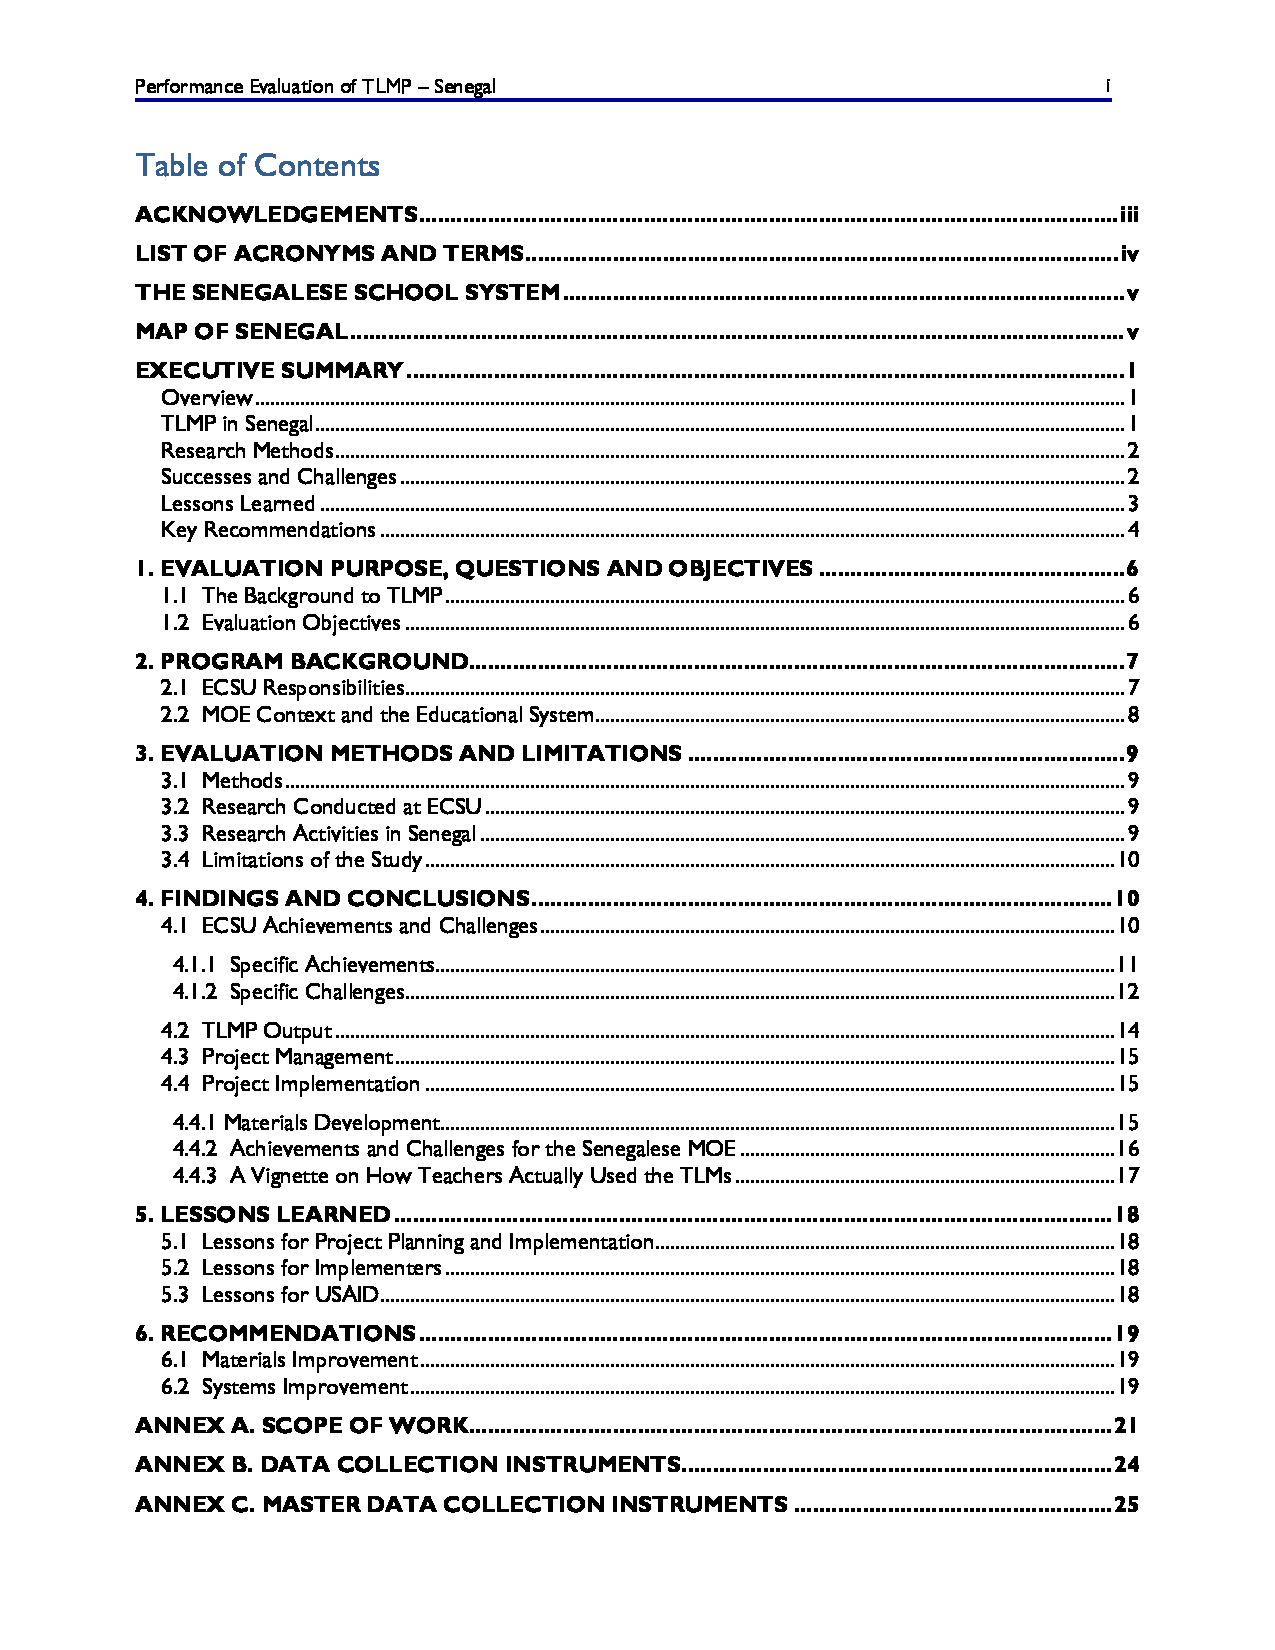

In [57]:

with pdfplumber.open(path) as pdf:
    first_page = pdf.pages[3]
    
first_page.to_image(resolution=150)

In [58]:
pdf_frame.loc[:,-4]

0          Performance Evaluation of TLMP – Senegal  i 
1                                    Table of Contents 
2     ACKNOWLEDGEMENTS ................................
3     LIST OF ACRONYMS AND TERMS ......................
4     THE SENEGALESE SCHOOL SYSTEM ....................
5     MAP OF SENEGAL ..................................
6     EXECUTIVE SUMMARY ...............................
7     Overview ........................................
8     TLMP in Senegal .................................
9     Research Methods ................................
10    Successes and Challenges ........................
11    Lessons Learned .................................
12    Key Recommendations .............................
13    1. EVALUATION PURPOSE, QUESTIONS AND OBJECTIVE...
14    1.1  The Background to TLMP .....................
15    1.2  Evaluation Objectives ......................
16    2. PROGRAM BACKGROUND ...........................
17    2.1  ECSU Responsibilities ...............

In [39]:
# Find column with Table of Contents

for col in range(pdf_frame.columns[0],pdf_frame.columns[-1]):
    check_contents = False
    non_nan_col = pdf_frame.loc[:,col][pdf_frame.loc[:,col].notna()]
    num_contents = non_nan_col.str.contains("Contents", case=False).sum()
    check_contents = num_contents == 1
    if check_contents == True:
        break
        
contents_col = col
contents_col

-4

In [40]:
# Find page number of executive summary

toc_non_nan = pdf_frame.loc[:,contents_col][pdf_frame.loc[:,contents_col].notna()]
exec_summ_cell = toc_non_nan[toc_non_nan.str.contains("Executive Summary|Summary", case=False)]
ec_page = int(re.findall(r'\d+', exec_summ_cell.values[0])[0])
ec_page


1

In [41]:
# Find page number of section after executive summary

after_exec = exec_summ_cell.index.values[0] + 1
after_exec_page = int(re.findall(r'\d+', toc_non_nan[after_exec])[0])
after_exec_page

1

In [301]:
# Subset dataframe to executive summary columns

exec_cells = pdf_frame_new.loc[:,ec_page:after_exec_page-1]
exec_non_nan = exec_cells.dropna(how='all')
exec_non_nan.columns = range(exec_non_nan.shape[1])

exec_non_nan.head()

,0,1,2,3,4,5,6,7,8
0,EXECUTIVE SUMMARY,sustainability of the e-BIZ centers.,"EVALUATION QUESTIONS, DESIGN, METHODS AND LIMI...",The e-BIZ center TTC has also brought importan...,The Evaluation Team received a folder titled '...,Many factors prevented the buildup of the e-BI...,All four e-BIZ centers are financially sustain...,If the parent companies are taken out from equ...,Financial data on changes in the volume of sal...
1,This report is a performance evaluation ...,The Evaluation Team has strong reservations ab...,In order to answer the main evaluation questio...,"pattern/prototype development, grading, marker...","however, a subsequent review of the submitted ...",to insufficient attention and effort to provid...,narrow definition of financial sustainability ...,financial sustainable. TTC generates between 8...,BIZ centers does not constitute the basi...
2,International Development (USAID) mission in B...,the e-BIZ centers and interviewed SMEs. ...,"e-BIZ center staff, the financial and op...",technology for these operations does not exist...,created on 25.07.2013.,in specific industries. Having in mind that e-...,Plan6. It is also based on an analysis of e-BI...,through services provided to its parent compan...,improved the competitiveness of their clients....
3,"Activity (EIA), an economic development activi...",evaluation process at several points by adjust...,"competitiveness of SME clients, the Evalu...",because all of these operations can be done ma...,The review of the documents also resulted in t...,dissemination and transfer of new high impact ...,"Arteco, were adjusted during the course of thi...",generates about one-third of its total revenue...,received SME services experienced a decrease i...
4,August 2013. The aim of the Activity was to en...,produced after the evaluation process had begu...,documentation created prior to and during...,the precision of the cut is not high. In addit...,three of the surveys were done by the e-BIZ ...,done too little to build e-BIZ center staff kn...,significant part or the majority of the e-BIZ ...,,change in total sales volume.


In [317]:
exec_non_nan.to_csv("exec_summ.csv")

In [309]:
collapsed_exec = pd.DataFrame(np.nan, index=range(1), columns=range(exec_non_nan.shape[1]))

for col in range(exec_non_nan.shape[1]):
    collapsed_exec.loc[:,col] = ''.join(exec_non_nan.loc[:,col].dropna(how='all'))
    
collapsed_exec

,0,1,2,3,4,5,6,7,8
0,EXECUTIVE SUMMARY This report is a perform...,sustainability of the e-BIZ centers. The Eval...,"EVALUATION QUESTIONS, DESIGN, METHODS AND LIMI...",The e-BIZ center TTC has also brought importan...,The Evaluation Team received a folder titled '...,Many factors prevented the buildup of the e-BI...,All four e-BIZ centers are financially sustain...,If the parent companies are taken out from equ...,Financial data on changes in the volume of sal...


In [318]:
exec_summ_string = '\n\n'.join(collapsed_exec.transpose().loc[:,0])

In [319]:
text_file = open("exec_summ.txt", "w")
n = text_file.write(exec_summ_string)
text_file.close()